<a href="https://colab.research.google.com/github/luisfernandosolis/Titanic/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#Example of classification using Titanic Data of Kaggle Repository

https://www.kaggle.com/adamml/titanic-to-beginner
https://medium.com/maheshkkumar/implementing-a-binary-classifier-in-python-b69d08d8da21#:~:text=A%20Binary%20Classifier%20is%20an,groups%2C%20either%20Zero%20or%20One.

In [4]:
DATASET_BASE="drive/MyDrive/Machine Learning Projects/Datasets/"

In [5]:
data=pd.read_csv(DATASET_BASE+"train.csv")

DATA ANALYSIS


In [6]:
pd.set_option("display.max_columns",20)
pd.set_option("display.max_rows",1000)

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA EXPLOTARION

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

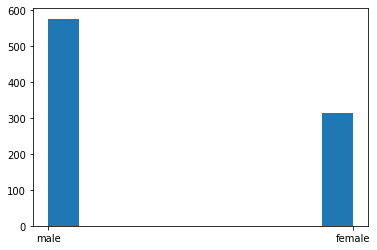

In [11]:
plt.hist(data.Sex)

In [12]:
data[["Survived","Sex"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
data[["Survived","Pclass"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


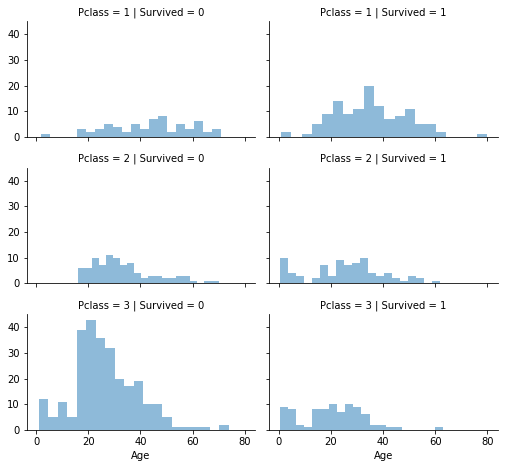

In [14]:
## GRAFICA PARA ANALISAR LA EDAD EN BASE DE LAS 2 CARACTERISTICAS (FILAS=Pclass,Columnas = sobrevive o no)
import seaborn as sns
grid=sns.FacetGrid(data,col="Survived", row="Pclass",size=2.2,aspect=1.6)
grid.map(plt.hist,"Age",alpha=.5,bins=20)
grid.add_legend()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


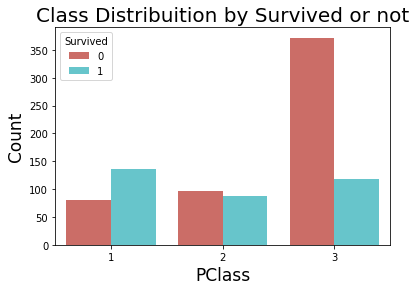

In [15]:
#ver la cantidad de sobrevivientes en base a la clase que pertenece
print(pd.crosstab(data.Survived,data.Pclass))
plt.figure()
sns.countplot(x="Pclass",data=data,hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)
plt.show()

In [16]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data[["Survived","FamilySize"]].groupby("FamilySize").mean()


,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


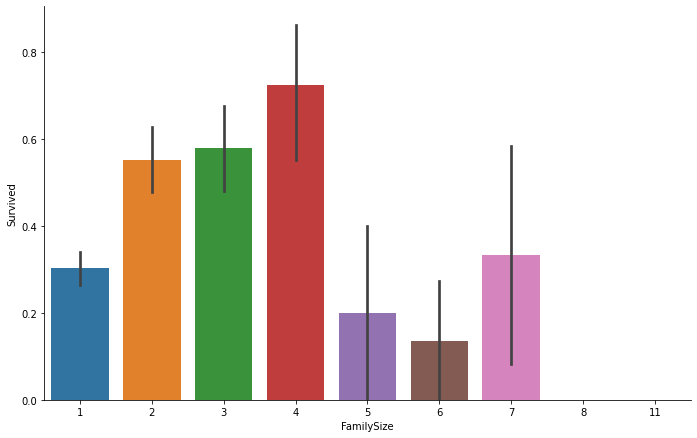

In [17]:
print(pd.crosstab(data.FamilySize,data.Survived))
sns.factorplot(x="FamilySize",y="Survived",data=data,kind="bar",size=6,aspect=1.6)
plt.show()

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
data=data.drop(["SibSp","Parch"],axis=1)


In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


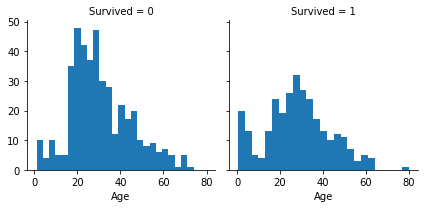

In [21]:
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Age",bins=25)


In [23]:
print(pd.crosstab(data.Survived,data.Embarked))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


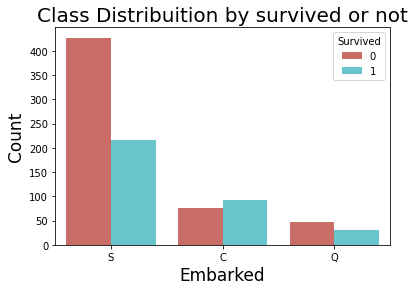

In [24]:
sns.countplot(x="Embarked",data=data,hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

3. CLEANING

Missing Value in (Age, Cabin, Embarked)

Categorical data in columns (Sex, Embarked)

mix of numeric and alphanumeric data types in Ticket column

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [26]:
print('Shape Befor drop: ', data.shape)

Shape Befor drop:  (891, 11)


VARIABLES QUE NO SON DETERMINNTES PARA CLASIFICAR LOS ELIMINAMOS, POR EJEMPLO TICKET Y CABIN

In [27]:
data = data.drop(['Ticket', 'Cabin'], axis=1)

In [28]:
print('Shape After drop: ',data.shape)

Shape After drop:  (891, 9)


## Mapearemos a la variable categorica Sex como male=1; female=0

In [29]:
data["Sex"]=data["Sex"].map({"female":0, "male":1}).astype(int)

In [30]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


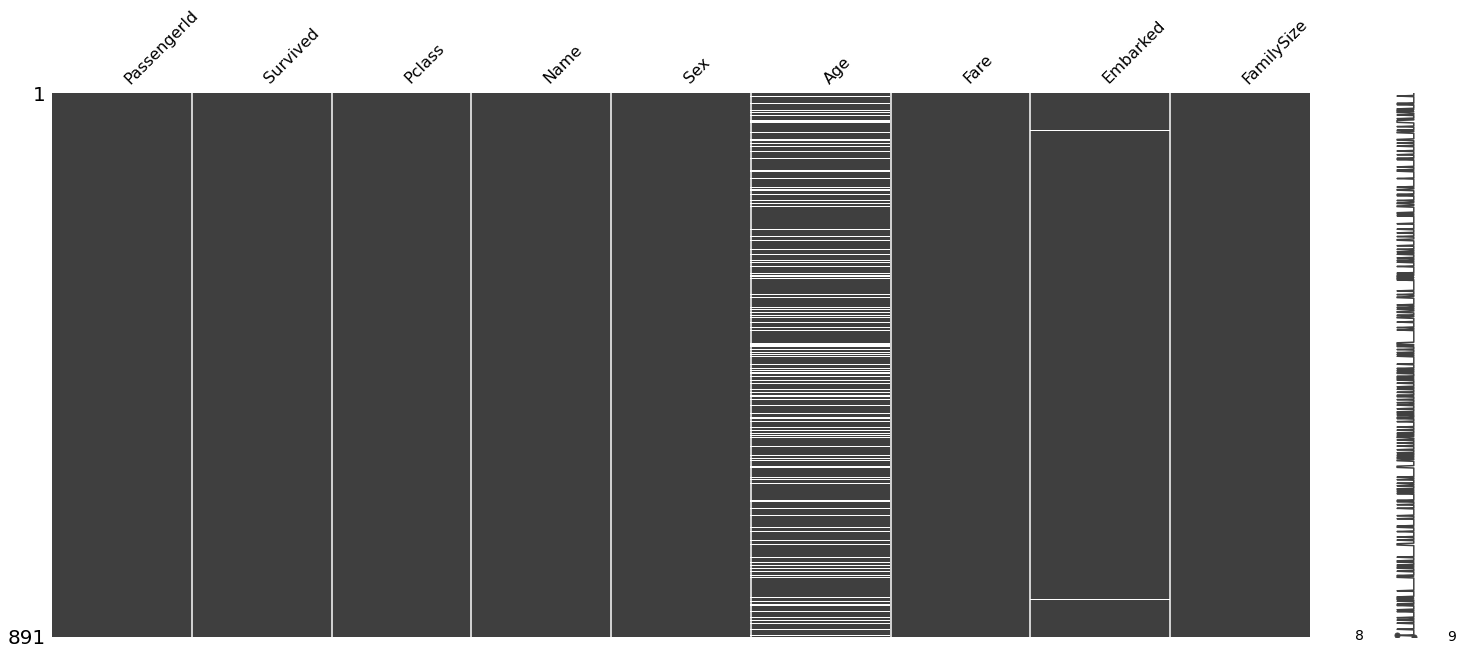

In [31]:
## detectar valores perdidos
import missingno as msno
msno.matrix (data)

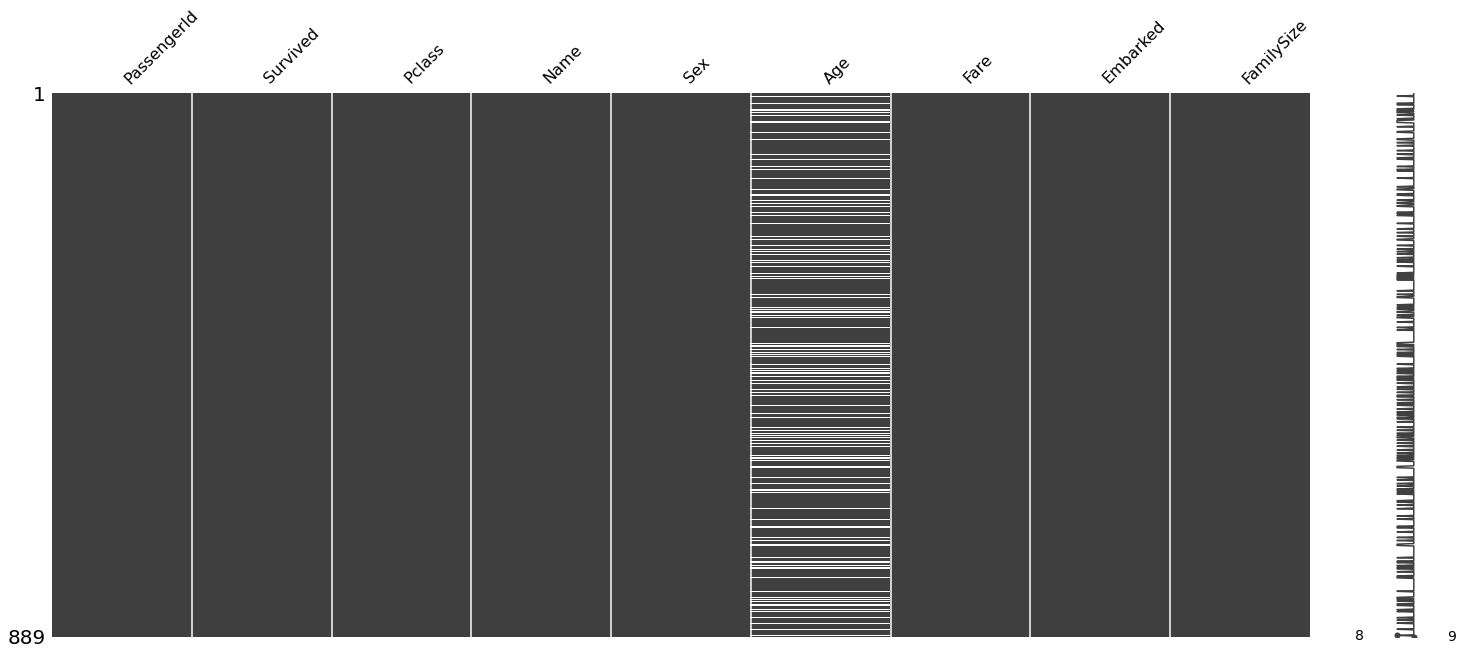

In [32]:
data=data.dropna(subset=["Embarked"])
msno.matrix (data)

REPARAREMOS LOS VALORES NULOS HACIENDO PREDICCIONES SOBRE LA COLUMNA EDAD

In [33]:
##todos los datos con edad nulo
data_withnull=data[data["Age"].isnull()]
data_withnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",1,NaN,8.4583,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,13.0000,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,7.2250,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,7.2250,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,7.8792,Q,1


In [34]:
## datos sin edad nulo
data.dropna(inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


In [35]:
x_train=data[["Survived","Pclass","Fare","FamilySize"]]
y_train=data[["Age"]]
x_train.head()

,Survived,Pclass,Fare,FamilySize
0,0,3,7.2500,2
1,1,1,71.2833,2
2,1,3,7.9250,1
3,1,1,53.1000,2
4,0,3,8.0500,1


In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(data_withnull[["Survived","Pclass","Fare","FamilySize"]])


In [37]:
## añadimos los valore predichos para data_withnull
data_withnull["Age"]=y_pred
data_withnull.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",1,28.971042,8.4583,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,30.305738,13.0000,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",0,22.461043,7.2250,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,28.987259,7.2250,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,22.452441,7.8792,Q,1


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


In [39]:
data_withnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",1,28.971042,8.4583,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,30.305738,13.0000,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",0,22.461043,7.2250,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,28.987259,7.2250,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,22.452441,7.8792,Q,1


In [40]:
## Concatenamos los nuevos valores de data_withnull a data
data=pd.concat([data,data_withnull],ignore_index=True)


In [41]:
data.shape

(889, 9)

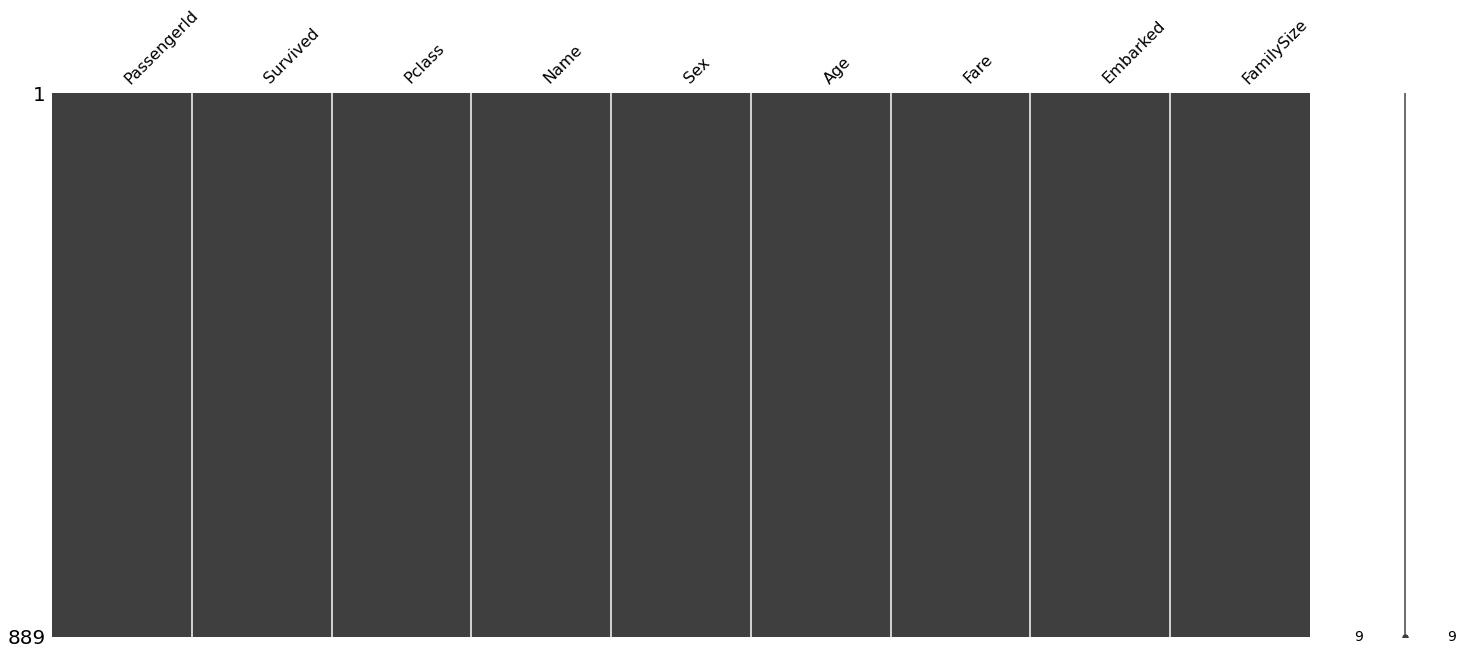

In [42]:
##verificamos nuesttro data sin valores nulos
msno.matrix (data)

In [43]:
## creamos una tabla de distribucion de frecuencias continuas
data['Age_group'] = pd.cut(data['Age'], 5)
data[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,"(0.34, 16.336]",0.514019
1,"(16.336, 32.252]",0.346555
2,"(32.252, 48.168]",0.397321
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


In [44]:
data.drop(columns="Age_group");

In [45]:
## agrupar valores  de las edades de los datos en categorias

In [46]:
data.loc[data["Age"]<=16,"Age"]=0
data.loc[(data["Age"]>16) & (data["Age"]<=32),"Age"]=1
data.loc[(data["Age"]>32) & (data["Age"]<=48),"Age"]=2
data.loc[(data["Age"]>48) & (data["Age"]<=64),"Age"]=3
data.loc[data["Age"]>64,"Age"]=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S,2,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C,2,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S,1,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S,2,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S,1,"(32.252, 48.168]"


In [47]:
## categoerizamos la variable Embarked
print (data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [48]:
data.drop(columns=["Age_group"],inplace=True);

In [49]:
## I thik Far it's not important so I decided to drop this
data=data.drop(columns=["Fare"])


In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,1


Prop6: Name¶  
Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.  
Survival among Title Age bands varies slightly.  
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer

In [51]:
# retain the new Title feature for model training.
data["Title"]=data.Name.str.extract("([A-Za-z]+)\.")
pd.crosstab(data["Title"],data["Sex"])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [52]:
## reemplazaremos algunos valores de los nombres por los más comunes
data["Title"]=data["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare")
data["Title"]=data["Title"].replace('Mlle', 'Miss')
data["Title"]=data["Title"].replace('Ms', 'Miss')
data["Title"]=data["Title"].replace('Mme', 'Mrs')

In [53]:
data[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


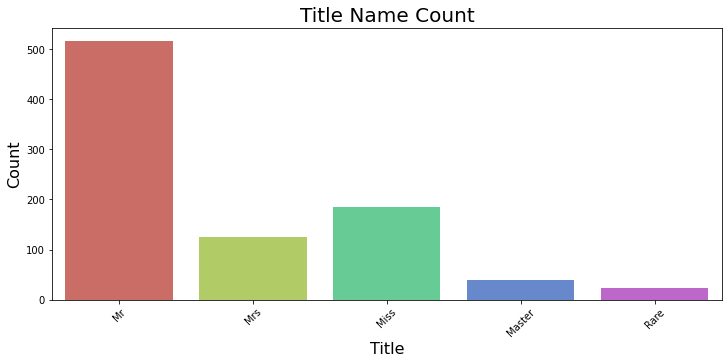

In [54]:
## show title names in a graph
plt.figure(figsize=(12,5))

##plotting a result
sns.countplot(x="Title",data=data,palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [55]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
data["Title"]=data["Title"].map(title_mapping)
data["Title"]=data["Title"].fillna(0)


In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,0,2,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,1,1


we can drop the Name feature now from our data.  
We also don't need the PassengerId column in the training dataset.

In [57]:
data=data.drop(columns=["PassengerId","Name"])

In [58]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,3,1,1.0,0,2,1
1,1,1,0,2.0,1,2,3
2,1,3,0,1.0,0,1,2
3,1,1,0,2.0,0,2,3
4,0,3,1,2.0,0,1,1


# Applying ML Models

In [59]:
## separate data in data_test and data_train

In [60]:
Y=data["Survived"]
X=data.drop(columns=["Survived"])

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [63]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,
                             max_features='auto',
                             criterion='entropy',
                             max_depth=10)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
model.score(X_train,Y_train)

0.865546218487395